In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

TABULAR_PATH = 'data/tabular/'
OUTPUT_PATH = './data/output/'
data_files = os.listdir(TABULAR_PATH)

In [2]:
def get_info(df):
    info_df = df.describe(include='all').T
    info_df['dtypes'] = df.dtypes
    info_df['missing'] = df.isna().sum()
    return info_df

def plot_top_10s(df):
    df = df[df.columns[1:]]
    num_cols = len(df.columns[1:])

    rows = int(np.ceil(num_cols/3))
    fig, axs = plt.subplots(rows, 3,figsize=(20,10))
    fig.tight_layout()
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.4, hspace=.3)

    for column,ax in zip(df.columns[1:],axs.ravel()[:num_cols]):
        df.groupby('PSGC')[column].sum()\
                .sort_values(ascending=True)\
                .tail(10)\
                .plot.barh(ax=ax)
        ax.set_title("Top 10 "+column)
    plt.show()
    
def plot_corr_heatmap(df):
    plt.figure(figsize=(20,10))
    sns.heatmap(df.corr(), annot=True,linewidths=.5, cbar=False,cmap="Blues")
    plt.show()

In [3]:
population_data = pd.read_excel(TABULAR_PATH+'Population 2010, 2015 ARMM,BCT.xlsx')
cond = population_data["PSGC_REGI"]=="PH150000000"
cols = ['REGI', 'PSGC_REGI', 'PROV', 'PSGC_PROV', 'MuniCities',
       'PSGC_CITY/MUNI', 'BrgyName', 'PSGC_BRGY']
psgc_info = population_data.loc[cond,cols]
print("psgc_info",psgc_info.shape)

Population_Schools_SDGs_df = pd.read_csv(OUTPUT_PATH+'Population_Schools_SDGs_Clean.csv')
print("Population_Schools_SDGs_df",Population_Schools_SDGs_df.shape)

cols = Population_Schools_SDGs_df.columns
popn_cols = [col for col in cols if '_age_' in col]
index_split = popn_cols.index('both_age_7_to_12')

popn_age_cols = popn_cols[:index_split]+['PSGC_BRGY']
popn_age_df = Population_Schools_SDGs_df[popn_age_cols]
print("popn_age_df",popn_age_df.shape)

student_age_cols = popn_cols[index_split:]+['PSGC_BRGY']
student_age_df = Population_Schools_SDGs_df[student_age_cols]
print("student_age_df",student_age_df.shape)

school_cols = [col for col in cols if 'SCH' in col.upper()]+['PSGC_BRGY']
school_df = Population_Schools_SDGs_df[school_cols]
print("school_df",school_df.shape)

sdg_cols = [col for col in cols if 'SDG' in col.upper()]+['PSGC_BRGY']
sdg_df = Population_Schools_SDGs_df[sdg_cols]
print("sdg_df",sdg_df.shape)

psgc_info (2482, 8)
Population_Schools_SDGs_df (2482, 84)
popn_age_df (2482, 52)
student_age_df (2482, 13)
school_df (2482, 15)
sdg_df (2482, 5)


## Schools Data

In [4]:
school_data = pd.merge(psgc_info,school_df,how="left",on='PSGC_BRGY')
get_info(school_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
No_of_Schools,1568,NaN,NaN,NaN,1.72768,1.43986,1,1,1,2,15,float64,914
SCH_TYPE_PRIVATE,1568,NaN,NaN,NaN,0.154337,0.687499,0,0,0,0,8,float64,914
SCH_TYPE_PUBLIC,1568,NaN,NaN,NaN,1.53763,1.16144,0,1,1,2,13,float64,914
SCH_TYPE_SUC,1568,NaN,NaN,NaN,0.0357143,0.217311,0,0,0,0,3,float64,914
SCH_CAT_CES,1568,NaN,NaN,NaN,0.112245,0.333461,0,0,0,0,3,float64,914
SCH_CAT_ES,1568,NaN,NaN,NaN,0.815689,0.793132,0,0,1,1,9,float64,914
SCH_CAT_JHS,1568,NaN,NaN,NaN,0.0994898,0.318018,0,0,0,0,3,float64,914
SCH_CAT_MD,1568,NaN,NaN,NaN,0.0223214,0.152031,0,0,0,0,2,float64,914
SCH_CAT_PES,1568,NaN,NaN,NaN,0.059949,0.361134,0,0,0,0,7,float64,914
SCH_CAT_PJHS,1568,NaN,NaN,NaN,0.0331633,0.214764,0,0,0,0,4,float64,914


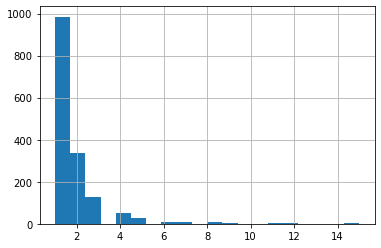

In [5]:
school_data['No_of_Schools'].hist(bins=20);

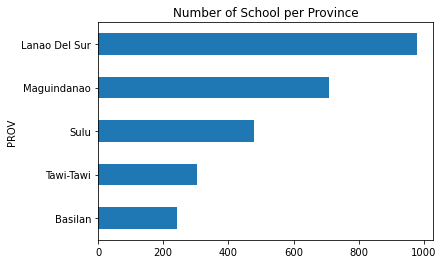

In [6]:
school_data.groupby('PROV')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .plot.barh()
plt.title("Number of School per Province")
plt.show();

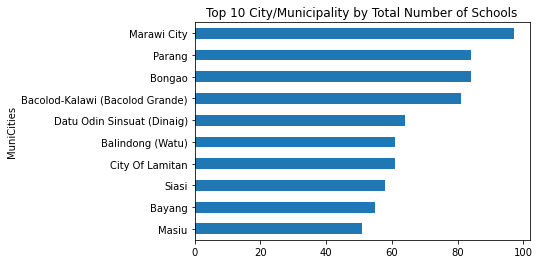

In [7]:
school_data.groupby('MuniCities')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 City/Municipality by Total Number of Schools")
plt.show();

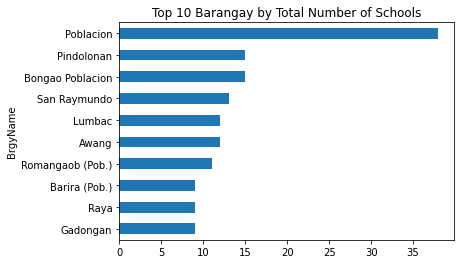

In [8]:
school_data.groupby('BrgyName')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 Barangay by Total Number of Schools")
plt.show();

In [9]:
cols = [col for col in school_data.columns if "SCH_TYPE" in col]
school_data.groupby("PROV")[cols].sum()

,SCH_TYPE_PRIVATE,SCH_TYPE_PUBLIC,SCH_TYPE_SUC
PROV,,,
Basilan,13.0,227.0,1.0
Lanao Del Sur,121.0,836.0,21.0
Maguindanao,75.0,631.0,1.0
Sulu,16.0,456.0,7.0
Tawi-Tawi,17.0,261.0,26.0


In [10]:
cols = [col for col in school_data.columns if "SCH_CAT" in col]
school_data.groupby("PROV")[cols].sum()

,SCH_CAT_CES,SCH_CAT_ES,SCH_CAT_JHS,SCH_CAT_MD,SCH_CAT_PES,SCH_CAT_PJHS,SCH_CAT_PS,SCH_CAT_PSHS,SCH_CAT_SHS,SCH_CAT_SUC
PROV,,,,,,,,,,
Basilan,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0
Lanao Del Sur,74.0,288.0,87.0,19.0,44.0,32.0,333.0,26.0,54.0,21.0
Maguindanao,48.0,388.0,34.0,12.0,33.0,9.0,114.0,21.0,47.0,1.0
Sulu,19.0,268.0,14.0,3.0,4.0,4.0,130.0,5.0,25.0,7.0
Tawi-Tawi,19.0,164.0,5.0,0.0,7.0,7.0,53.0,3.0,20.0,26.0


## Population Data

In [11]:
popn_age_data = pd.merge(psgc_info,popn_age_df,how="left",on='PSGC_BRGY')
get_info(popn_age_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
both_age_0_to_4,2482,NaN,NaN,NaN,224.542,288.887,2,97,151,261.75,4912,float64,0
male_age_0_to_4,2482,NaN,NaN,NaN,113.757,149.265,0,47,76,130,2521,float64,0
female_age_0_to_4,2482,NaN,NaN,NaN,110.785,140.954,2,47,75,130,2391,float64,0
both_age_5_to_9,2482,NaN,NaN,NaN,232.342,317.036,8,102,153,264,5386,float64,0
male_age_5_to_9,2482,NaN,NaN,NaN,117.104,160.74,4,50,77,133,2682,float64,0
female_age_5_to_9,2482,NaN,NaN,NaN,115.239,157.194,3,50,77,130,2745,float64,0
both_age_10_to_14,2482,NaN,NaN,NaN,209.51,297.393,11,86,138,236,5119,float64,0
male_age_10_to_14,2482,NaN,NaN,NaN,105.564,151.909,4,43,68,121,2557,float64,0
female_age_10_to_14,2482,NaN,NaN,NaN,103.945,146.328,6,43,69,118,2592,float64,0
both_age_15_to_19,2482,NaN,NaN,NaN,176.341,265.826,2,68,112,196,5164,float64,0


In [12]:
cols = [col for col in popn_age_data.columns if "both_" in col]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
both_age_0_to_4,50098.0,158186.0,182067.0,114626.0,52337.0
both_age_5_to_9,50268.0,162546.0,189599.0,120542.0,53718.0
both_age_10_to_14,45601.0,138399.0,172035.0,113736.0,50232.0
both_age_15_to_19,39087.0,115084.0,146293.0,94363.0,42852.0
both_age_20_to_24,29635.0,98745.0,108478.0,66754.0,34588.0
both_age_25_to_29,25732.0,85420.0,99114.0,58700.0,30882.0
both_age_30_to_34,22195.0,71093.0,84212.0,53748.0,26238.0
both_age_35_to_39,20366.0,69634.0,81946.0,56605.0,25686.0
both_age_40_to_44,17144.0,56687.0,67590.0,47365.0,20814.0
both_age_45_to_49,14914.0,45304.0,54993.0,37080.0,17305.0


In [13]:
cols = [col for col in popn_age_data.columns if ("female_" in col)]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
female_age_0_to_4,24584.0,79616.0,87781.0,57444.0,25544.0
female_age_5_to_9,24470.0,82308.0,92173.0,60752.0,26319.0
female_age_10_to_14,22510.0,70069.0,83477.0,56993.0,24943.0
female_age_15_to_19,19663.0,59148.0,72043.0,47926.0,21448.0
female_age_20_to_24,15297.0,52285.0,54771.0,35167.0,17619.0
female_age_25_to_29,13358.0,45093.0,51188.0,31456.0,16205.0
female_age_30_to_34,11353.0,37594.0,43199.0,28543.0,13504.0
female_age_35_to_39,10611.0,36037.0,42058.0,29337.0,12948.0
female_age_40_to_44,8785.0,28842.0,33668.0,23814.0,10050.0
female_age_45_to_49,7523.0,22165.0,26599.0,17823.0,8438.0


In [14]:
cols = [col for col in popn_age_data.columns if ("male_" in col) and not ("female_" in col)]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
male_age_0_to_4,25514.0,78570.0,94286.0,57182.0,26793.0
male_age_5_to_9,25798.0,80238.0,97426.0,59790.0,27399.0
male_age_10_to_14,23091.0,68330.0,88558.0,56743.0,25289.0
male_age_15_to_19,19424.0,55936.0,74250.0,46437.0,21404.0
male_age_20_to_24,14338.0,46460.0,53707.0,31587.0,16969.0
male_age_25_to_29,12374.0,40327.0,47926.0,27244.0,14677.0
male_age_30_to_34,10842.0,33499.0,41013.0,25205.0,12734.0
male_age_35_to_39,9755.0,33597.0,39888.0,27268.0,12738.0
male_age_40_to_44,8359.0,27845.0,33922.0,23551.0,10764.0
male_age_45_to_49,7391.0,23139.0,28394.0,19257.0,8867.0


In [15]:
student_age_data = pd.merge(psgc_info,student_age_df,how="left",on='PSGC_BRGY')
get_info(student_age_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
both_age_7_to_12,2482,NaN,NaN,NaN,272.36,379.964,9,115,181,309,6691,float64,0
male_age_7_to_12,2482,NaN,NaN,NaN,137.288,194.084,2,57,90,157,3314,float64,0
female_age_7_to_12,2482,NaN,NaN,NaN,135.072,186.849,4,58,91,153,3377,float64,0
both_age_13_to_16,2482,NaN,NaN,NaN,158.958,229.846,5,64,104,179,3999,float64,0
male_age_13_to_16,2482,NaN,NaN,NaN,79.8215,115.929,2,31,52,91,1967,float64,0
female_age_13_to_16,2482,NaN,NaN,NaN,79.1362,114.722,2,32,52,89,2032,float64,0
both_age_17_to_18,2482,NaN,NaN,NaN,66.7373,103.123,1,25,42,73,2030,float64,0
male_age_17_to_18,2482,NaN,NaN,NaN,33.0117,51.5566,0,12,21,37,1011,float64,0
female_age_17_to_18,2482,NaN,NaN,NaN,33.7256,52.251,0,13,21,37,1019,float64,0
both_age_19_to_22,2482,NaN,NaN,NaN,114.521,174.738,0,44,73,124,3665,float64,0


In [16]:
cols = [col for col in student_age_data.columns if "both_" in col]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
both_age_7_to_12,58741.0,184855.0,222024.0,146347.0,64031.0
both_age_13_to_16,34605.0,104100.0,131971.0,86121.0,37736.0
both_age_17_to_18,14991.0,43206.0,55289.0,35709.0,16447.0
both_age_19_to_22,25252.0,80242.0,91142.0,57982.0,29624.0


In [17]:
cols = [col for col in student_age_data.columns if ("female_" in col)]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
female_age_7_to_12,28782.0,93519.0,107707.0,73597.0,31644.0
female_age_13_to_16,17082.0,52707.0,64552.0,43437.0,18638.0
female_age_17_to_18,7608.0,22378.0,27257.0,18111.0,8353.0
female_age_19_to_22,13002.0,42094.0,45344.0,30017.0,14838.0


In [18]:
cols = [col for col in student_age_data.columns if ("male_" in col) and not ("female_" in col)]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
male_age_7_to_12,29959.0,91336.0,114317.0,72750.0,32387.0
male_age_13_to_16,17523.0,51393.0,67419.0,42684.0,19098.0
male_age_17_to_18,7383.0,20828.0,28032.0,17598.0,8094.0
male_age_19_to_22,12250.0,38148.0,45798.0,27965.0,14786.0


## SDG-related Data

In [19]:
sdg_data = pd.merge(psgc_info,sdg_df,how="left",on='PSGC_BRGY')
get_info(sdg_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
SDG_Households_Electricity_Light_Pct,2482,NaN,NaN,NaN,0.510426,0.446279,0,0.0138889,0.617411,0.990172,1,float64,0
SDG_Households_Kerosene_Gass_Light_Pct,2482,NaN,NaN,NaN,0.166043,0.26629,0,0,0.0235141,0.216544,1,float64,0
SDG_Households_Drinking_Owned_Faucet_Pct,2482,NaN,NaN,NaN,0.0747605,0.189669,0,0,0.00340152,0.0298225,1,float64,0
SDG_Households_Drinking_Shared_Faucet_Pct,2482,NaN,NaN,NaN,0.121344,0.256643,0,0,0.002137,0.0582168,1,float64,0
PSGC_BRGY,2482,2482,PH150708007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,0
